# 不均衡なデータに対する分類問題

データにつけられたクラスラベルに偏りがある場合を考える。  

例えば癌の発見に関して、健康な患者が全体の90%、癌患者が全体の10%の場合のデータセットを利用した場合、  
全ての患者を「健康」と診断することで、90%の正解率(Accuracy)を得ることができるが、これは有益ではない。

このような**「不均衡なデータ」**が与えられた場合にどのような対応を取るべきかをまとめる。

### 分類モデルを判断するときの指標

#### 正解率  
テストデータセットがどれだけ正しく分類できたかを表す。  

$$ACC= \frac{TP+TN}{FP+FN+TP+TN}$$

##### 再現率・検出率(Recall)
真が陽性のデータのうち、どれだけを陽性と分類できたか
$$Recall = \frac{TP}{TP+FN}$$

##### 適合率(Precision)
陽性と判断されたデータのうち、どれだけが正しく分類できたか
$$Precision = \frac{TP}{TP+FP}$$

##### F1値
F-measure, F-score, F1 Score とも呼ばれる。適合率と再現率の調和平均。  
検出率は高くても精度が低くなっていないか、逆に、精度は高くても検出率が低いモデルでないか、といった評価を示す。

$$F1 = 2\frac{PRE*REC}{PRE+REC}$$

#### ROC曲線
分類器のしきい値を変えることによって変動する真陽性率と偽陽性率をグラフでプロットしたもの

真陽性率(TPR)：TP / (TP + FN)：真が陽性のデータのうち、どれだけを陽性と分類できたか。(=再現率)  
偽陽性率(FPR)：FP / (FP + TN)：真が陰性のデータのうち、どれだけを陽性と判断したか

このような**「不均衡なデータ」**が与えられた場合は、再現率・適合率またはRCO曲線を求めて評価することが大切である。

### 不均衡なデータに対する調整

データの不均衡な影響を受けるのは、評価だけではない。不均衡はモデルを適合させるときの学習アルゴリズムにも影響を与える。  
一般に機械学習のアルゴリズムはコスト関数や報酬を最適化させるが、それはトレーニングサンプルの合計値として与えられる。  
すなわち、不均衡なデータの場合は多数派クラスに基づいて予測を最適化しているといえる。

このように不均衡なデータに対しモデルを適合させる際は以下のような選択肢が考えられる。

1.   少数派クラスに対する誤った予測に大きなペナルティを科す
2.   多数派クラスと少数派クラスのサンプル数を調整する
    1. 多数派クラスのundersampling  
    →全てが重要なデータならやるべきでない
    2. 少数派クラスのoversampling  
    →過学習リスクが高くなる
    3. 人工的なトレーニングサンプルの生成(ex. SMOTE)  
    →人工的に少数派クラスをつくってあげる  
    
    ※SMOTE  
    隣接するインスタンスの凸結合から少数派クラスの新しいインスタンスを作成するという手法
    少数派クラスのインスタンスのうち2つの間に直線を引き、その直線からある点をサンプリングし、  
    少数派クラスの新しいインスタンスとする処理を実施する。
    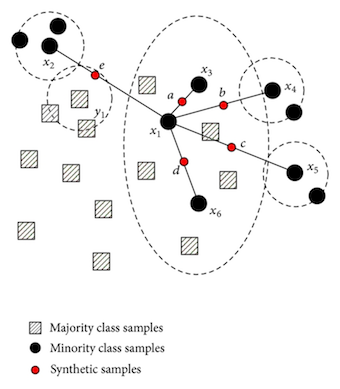